In [1]:
import numpy as np
from matplotlib import pyplot as pltf
from matplotlib.pyplot import figure
from skimage import io
import os
import pandas as pd
import cv2

%load_ext autoreload
%autoreload 2

In [55]:
HOME = os.path.expanduser("~")
animal = 'DK39'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}'
INPUT = os.path.join(DIR, 'preps', 'CH3', 'full_aligned')
dfpath = f'/home/eddyod/programming/brains/{animal}/{animal}.CH3.Premotor.csv'

In [29]:
df = pd.read_csv(dfpath)
df.drop(["Description"], inplace=True, axis=1)
df.head()

,Layer,X,Y,Section
0,COM,40364.882812,18199.505859,140
1,COM,37069.683594,20100.375000,178
2,COM,41901.320312,22575.681641,198
3,COM,38569.109375,17311.771484,203
4,COM,39468.523438,23531.521484,203


In [32]:
df[['Layer', 'X', 'Y', 'Section']].groupby(['Layer','Section']).agg(['count'])

X     Y
                count count
Layer   Section            
COM     140         1     1
        178         1     1
        198         1     1
        203         2     2
        233         3     3
...               ...   ...
starter 260         2     2
        264         3     3
        268         4     4
        272         3     3
        276         5     5

[85 rows x 2 columns]

In [56]:
#section = 156
#premotor = df[(df["Layer"] == 'premotor') & (df["Section"] == section)]
premotor = df[(df["Layer"] == 'premotor')]
premotor[['Layer', 'X', 'Y', 'Section']].groupby(['Section']).agg(['count'])

,Layer,X,Y
,count,count,count
Section,,,
141,1,1,1
147,1,1,1
151,3,3,3
156,5,5,5
161,4,4,4
165,3,3,3
171,4,4,4
176,6,6,6


In [44]:
pts = premotor[['X','Y']].values / 1
#pts = np.around(pts,0)
#pts = pts.astype(int)

In [45]:
points = pts.tolist()

In [46]:
premotor[['X']].values + (20*5)

array([[37308.566406],
       [37413.679688],
       [37653.105469],
       [38120.277344],
       [38190.351562]])

In [48]:
file = f'{section}.tif' 
infile = os.path.join(INPUT, file)

In [ ]:
for index, row in premotor.iterrows():
    print(row['c1'], row['c2'])

In [53]:
OUTPUT = f'{HOME}/programming/brains/{animal}/CH3'
os.makedirs(OUTPUT, exist_ok=True)
outpath =  os.path.join(OUTPUT, f'{section}.points.tif')

cmd = f'convert {infile} -fill transparent -stroke yellow'  
for point in points:
    endcircle = point[0] + (20*5)
    cmd += f' -draw "circle {point[0]},{point[1]},{endcircle},{point[1]}" '
cmd += f' {outpath}'

#proc = Popen(cmd, shell=True)
#proc.wait()
print(cmd)
chop = 55800//2

cmd = f'convert {outpath} -gravity West -chop {chop}x0 {outpath}' 
#proc = Popen(cmd, shell=True)
#proc.wait()
print(cmd)

cmd = f'convert {outpath} -resize 10% -normalize -auto-level -compress lzw {outpath}' 
#proc = Popen(cmd, shell=True)
#proc.wait()
print(cmd)
    

#convert 140.tif -fill transparent -stroke yellow -draw "circle 37453.921875,18052.832031, 37553.921875,18052.832031" \
#-draw "circle 37523.511719,18041.232422, 37623.511719,18041.232422" \
#-draw "circle 41302.972656,14869.208008000001, 41402.972656,14869.208008000001" \
#-draw "circle 41334.453125,14627.288086000002, 41434.453125,14627.288086000002" \
#-draw "circle 41516.722656,14706.824219, 41616.722656,14706.824219" 140.one.tif


#convert 140.one.tif -gravity West -chop 30000x0 140.chopped.tif
#convert 140.chopped.tif -resize 10% -normalize -auto-level -compress lzw 140.10p.draw.tif

    
    
    


convert /net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK39/preps/CH3/full_aligned/156.tif -fill transparent -stroke yellow -draw "circle 37208.566406,19300.851562,37308.566406,19300.851562"  -draw "circle 37313.679688,19064.345703,37413.679688,19064.345703"  -draw "circle 37553.105469,19058.505859,37653.105469,19058.505859"  -draw "circle 38020.277344,18360.669922,38120.277344,18360.669922"  -draw "circle 38090.351562,18857.039062,38190.351562,18857.039062"  /home/eddyod/programming/brains/DK39/CH3/156.points.tif
convert /home/eddyod/programming/brains/DK39/CH3/156.points.tif -gravity West -chop 27900x0 /home/eddyod/programming/brains/DK39/CH3/156.points.tif
convert /home/eddyod/programming/brains/DK39/CH3/156.points.tif -resize 10% -normalize -auto-level -compress lzw /home/eddyod/programming/brains/DK39/CH3/156.points.tif


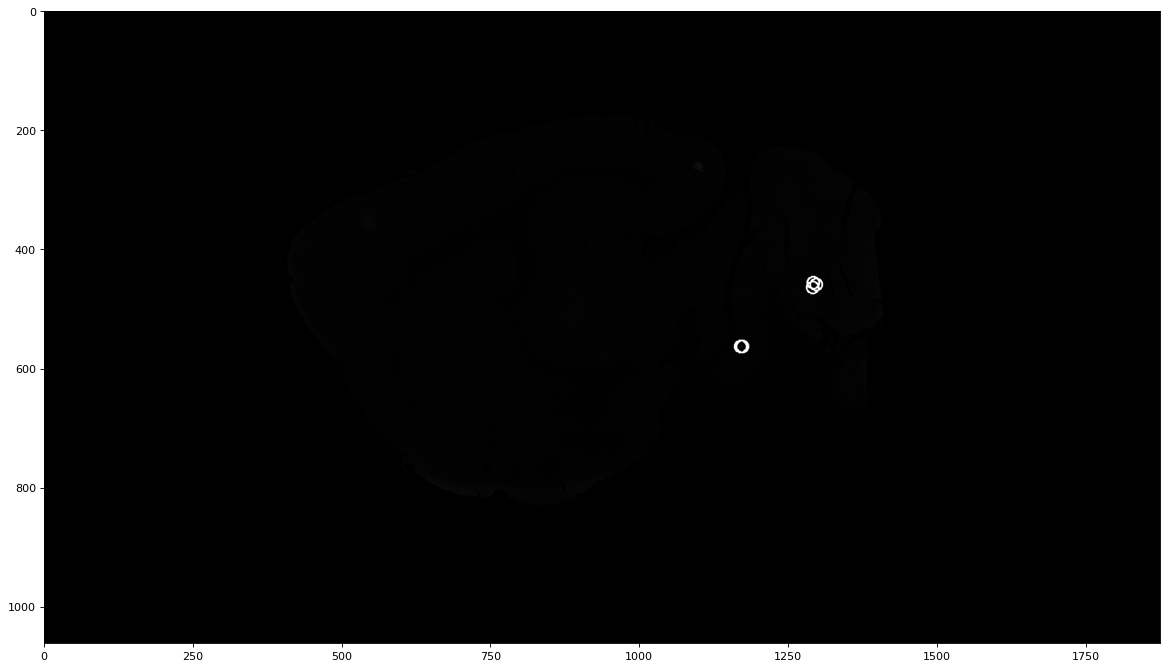

In [10]:
figure(figsize=(18, 16), dpi=80)
pltf.imshow(img, cmap="gray")
#pltf.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=10)
pltf.show()
